# 미세먼지 유발 영향인자 분석

In [146]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import shapiro
from scipy import stats

# Scale 변환-> 설명변수 변환 : 회귀분석.설명변수 회귀계수 표준화
from sklearn.preprocessing import StandardScaler

# train, test 데이터 분할 함수
from sklearn.model_selection import train_test_split

# 회귀모델 
import statsmodels.formula.api as smf
import statsmodels.api as sm
# 선형회귀모형
from sklearn.linear_model import LinearRegression

# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE

# 평가 함수
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [147]:
# 한글 폰트(맑은 고딕) 적용
matplotlib.rc("font", family="Malgun Gothic")
matplotlib.rcParams['axes.unicode_minus'] = False

## 데이터 현황

In [148]:
df_raw = pd.read_csv('DATA/AIR_POLLUTION.csv')
df_raw

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
0,2019-07-01,29.0,0.054,0.021,0.5,0.003,24.03,0.00,2.30,249,63.2,995.1,0.0,5.70
1,2019-07-02,26.0,0.053,0.020,0.5,0.003,24.29,0.00,2.26,265,63.2,998.6,0.0,3.83
2,2019-07-03,30.0,0.042,0.023,0.4,0.003,24.18,0.00,1.79,280,65.3,998.3,0.0,6.29
3,2019-07-04,28.0,0.034,0.026,0.4,0.003,25.35,0.00,2.04,263,58.6,996.6,0.0,2.54
4,2019-07-05,29.0,0.045,0.035,0.5,0.003,27.30,0.00,1.45,175,45.5,993.5,0.0,3.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2020-06-26,19.0,0.039,0.016,0.4,0.003,21.66,0.41,3.12,228,84.0,996.0,0.0,8.73
362,2020-06-27,22.0,0.044,0.017,0.4,0.004,23.94,0.00,1.93,217,69.8,995.8,0.0,6.21
363,2020-06-28,27.0,0.044,0.009,0.4,0.003,25.03,0.00,2.35,283,71.3,994.7,0.0,2.63
364,2020-06-29,36.0,0.026,0.028,0.6,0.003,24.06,1.26,2.48,103,75.5,992.9,0.0,7.58


In [149]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MeasDate   366 non-null    object 
 1   PM10       365 non-null    float64
 2   O3         365 non-null    float64
 3   NO2        365 non-null    float64
 4   CO         311 non-null    float64
 5   SO2        365 non-null    float64
 6   TEMP       366 non-null    float64
 7   RAIN       366 non-null    float64
 8   WIND       366 non-null    float64
 9   WIND_DIR   366 non-null    int64  
 10  HUMIDITY   366 non-null    float64
 11  ATM_PRESS  366 non-null    float64
 12  SNOW       366 non-null    float64
 13  CLOUD      366 non-null    float64
dtypes: float64(12), int64(1), object(1)
memory usage: 40.2+ KB


In [150]:
df_raw.shape

(366, 14)

In [151]:
df_raw.isnull().sum()

MeasDate      0
PM10          1
O3            1
NO2           1
CO           55
SO2           1
TEMP          0
RAIN          0
WIND          0
WIND_DIR      0
HUMIDITY      0
ATM_PRESS     0
SNOW          0
CLOUD         0
dtype: int64

In [152]:
df_raw.drop('MeasDate', axis = 1, inplace = True)
df_raw.dropna(subset=['PM10'] , inplace = True)

 목표변수 값의 결측지 제거

In [153]:
df_raw.fillna(df_raw.mean(), inplace = True)

CO(일산화탄소 농도) 55개의 결측치 평균값으로 대체

In [154]:
df_raw.isnull().sum()

PM10         0
O3           0
NO2          0
CO           0
SO2          0
TEMP         0
RAIN         0
WIND         0
WIND_DIR     0
HUMIDITY     0
ATM_PRESS    0
SNOW         0
CLOUD        0
dtype: int64

PM10            AxesSubplot(0.125,0.125;0.0503247x0.755)
O3            AxesSubplot(0.18539,0.125;0.0503247x0.755)
NO2          AxesSubplot(0.245779,0.125;0.0503247x0.755)
CO           AxesSubplot(0.306169,0.125;0.0503247x0.755)
SO2          AxesSubplot(0.366558,0.125;0.0503247x0.755)
TEMP         AxesSubplot(0.426948,0.125;0.0503247x0.755)
RAIN         AxesSubplot(0.487338,0.125;0.0503247x0.755)
WIND         AxesSubplot(0.547727,0.125;0.0503247x0.755)
WIND_DIR     AxesSubplot(0.608117,0.125;0.0503247x0.755)
HUMIDITY     AxesSubplot(0.668506,0.125;0.0503247x0.755)
ATM_PRESS    AxesSubplot(0.728896,0.125;0.0503247x0.755)
SNOW         AxesSubplot(0.789286,0.125;0.0503247x0.755)
CLOUD        AxesSubplot(0.849675,0.125;0.0503247x0.755)
dtype: object

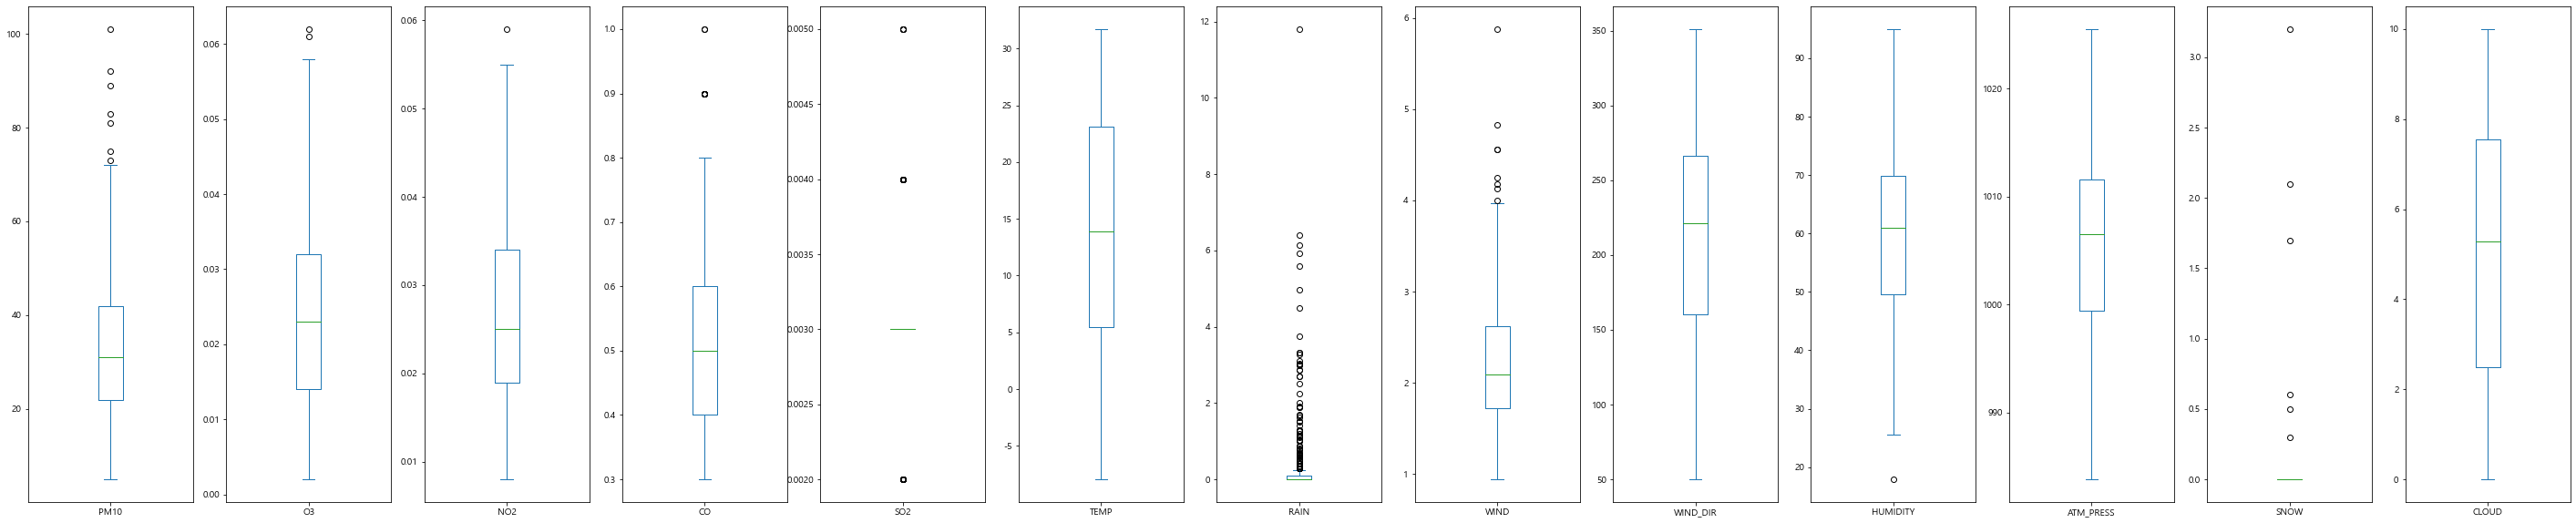

In [155]:
df_raw.plot(kind = "box", figsize = (50,10), subplots = True, sharex = False, sharey = False)

RAIN, WIND, SNOW에서 이상치로 판단되는 수치들을 발견하였지만 계절적 영향을 고려해서 이상치로 판단하기 어렵다고 판단하여 이상치 처리를 하지 않았다.

## 탐색적 분석

array([[<AxesSubplot:title={'center':'PM10'}>,
        <AxesSubplot:title={'center':'O3'}>,
        <AxesSubplot:title={'center':'NO2'}>,
        <AxesSubplot:title={'center':'CO'}>],
       [<AxesSubplot:title={'center':'SO2'}>,
        <AxesSubplot:title={'center':'TEMP'}>,
        <AxesSubplot:title={'center':'RAIN'}>,
        <AxesSubplot:title={'center':'WIND'}>],
       [<AxesSubplot:title={'center':'WIND_DIR'}>,
        <AxesSubplot:title={'center':'HUMIDITY'}>,
        <AxesSubplot:title={'center':'ATM_PRESS'}>,
        <AxesSubplot:title={'center':'SNOW'}>],
       [<AxesSubplot:title={'center':'CLOUD'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

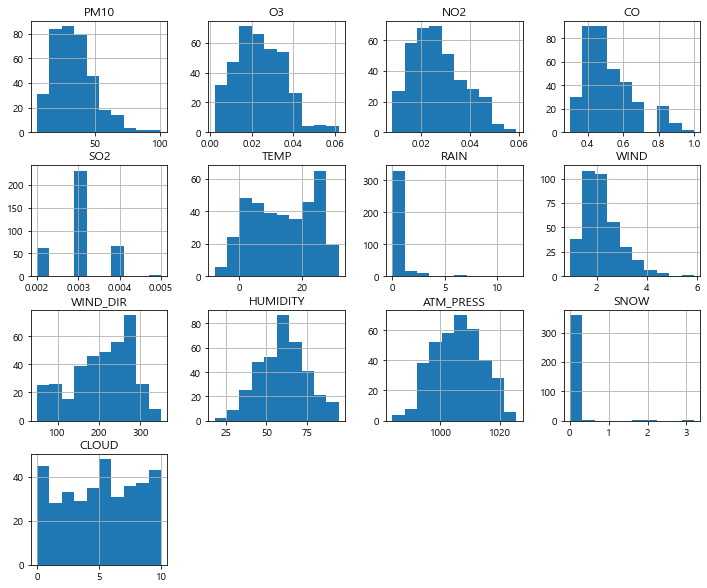

In [336]:
df_raw.hist(figsize = (12,10))

### 그래프 분석

<AxesSubplot:xlabel='O3', ylabel='PM10'>

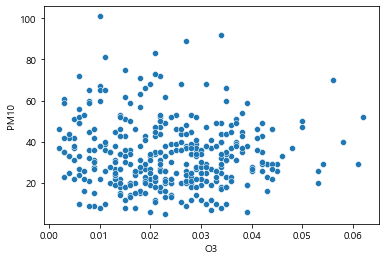

In [157]:
sns.scatterplot(x = "O3", y = "PM10", data = df_raw)

변수간의 관계파악 어려움

<AxesSubplot:xlabel='NO2', ylabel='PM10'>

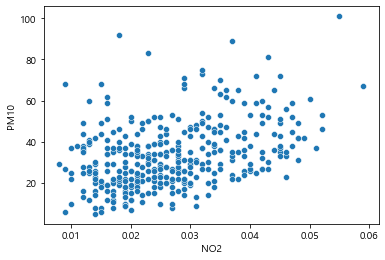

In [158]:
sns.scatterplot(x = "NO2", y = "PM10", data = df_raw)

미세한 양의 선형적 관계 파악

<AxesSubplot:xlabel='CO', ylabel='PM10'>

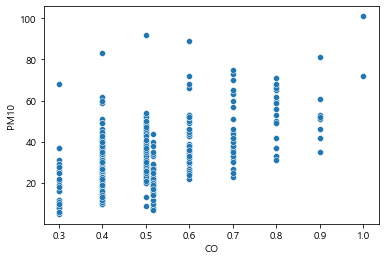

In [159]:
sns.scatterplot(x = "CO", y = "PM10", data = df_raw)

미세한 양의 선형적 관계 파악

<AxesSubplot:xlabel='SO2', ylabel='PM10'>

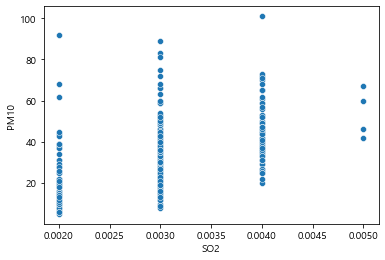

In [160]:
sns.scatterplot(x = "SO2", y = "PM10", data = df_raw)

미세한 양의 선형적 관계 파악

<AxesSubplot:xlabel='TEMP', ylabel='PM10'>

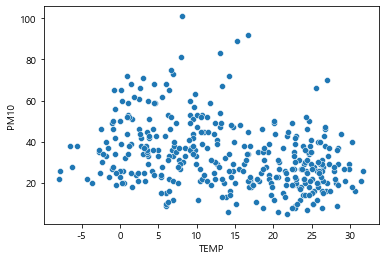

In [161]:
sns.scatterplot(x = "TEMP", y = "PM10", data = df_raw)

미세한 음의 선형관계 파악

<AxesSubplot:xlabel='RAIN', ylabel='PM10'>

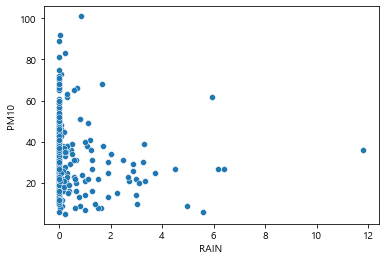

In [162]:
sns.scatterplot(x = "RAIN", y = "PM10", data = df_raw)

변수간의 관계파악 어려움, 대부분 강수량 0에 분포

<AxesSubplot:xlabel='O3', ylabel='PM10'>

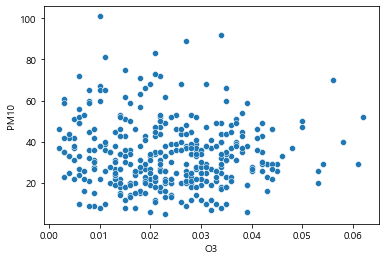

In [163]:
sns.scatterplot(x = "O3", y = "PM10", data = df_raw)

변수간의 관계파악 어려움

<AxesSubplot:xlabel='WIND_DIR', ylabel='PM10'>

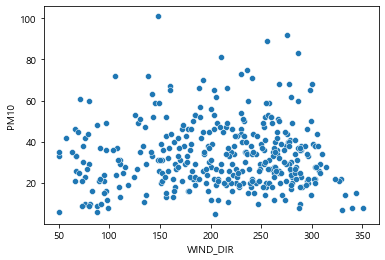

In [164]:
sns.scatterplot(x = "WIND_DIR", y = "PM10", data = df_raw)

변수간의 관계파악 어려움

<AxesSubplot:xlabel='HUMIDITY', ylabel='PM10'>

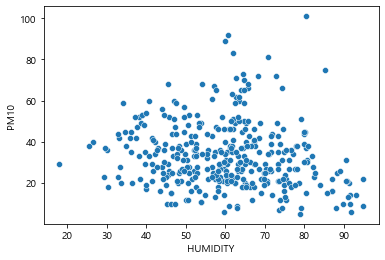

In [165]:
sns.scatterplot(x = "HUMIDITY", y = "PM10", data = df_raw)

미세한 음의 선형관계 파악

<AxesSubplot:xlabel='ATM_PRESS', ylabel='PM10'>

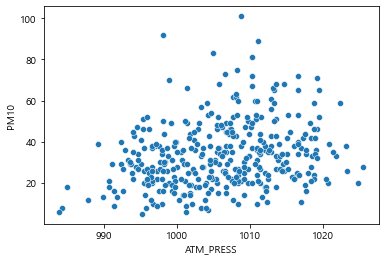

In [166]:
sns.scatterplot(x = "ATM_PRESS", y = "PM10", data = df_raw)

미세한 양의 선형관계 파악

<AxesSubplot:xlabel='SNOW', ylabel='PM10'>

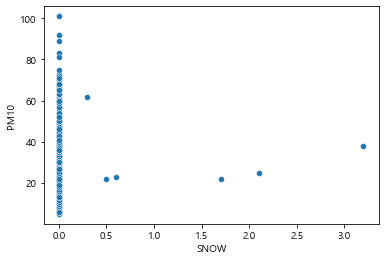

In [167]:
sns.scatterplot(x = "SNOW", y = "PM10", data = df_raw)

변수간의 관계파악 어려움. 대부분 적설량 0에 분포

<AxesSubplot:xlabel='CLOUD', ylabel='PM10'>

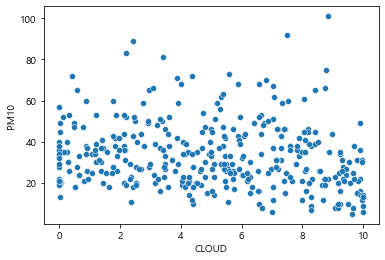

In [168]:
sns.scatterplot(x = "CLOUD", y = "PM10", data = df_raw)

변수간의 관계파악 어려움

### 카이제곱 검정

In [169]:
df = pd.concat([df_raw['PM10'], df_raw['O3']], axis = 1)

# chi-square test 실행
chi, pval, dof, expected = stats.chi2_contingency(df.T)

# chi-square test 결과 출력
print( "chi-square test ")
print( ' chisq: {0:0.3f}' .format(chi))
print( ' p: {0:0.3f}'.format(pval))
print( ' degree pf freedom: {}' .format(dof))

chi-square test 
 chisq: 5.023
 p: 1.000
 degree pf freedom: 364


p > 0.05. 귀무가설이므로 서로 연관성 없음

In [170]:
df = pd.concat([df_raw['PM10'], df_raw['NO2']], axis = 1)

# chi-square test 실행
chi, pval, dof, expected = stats.chi2_contingency(df.T)

# chi-square test 결과 출력
print( "chi-square test ")
print( ' chisq: {0:0.3f}' .format(chi))
print( ' p: {0:0.3f}'.format(pval))
print( ' degree pf freedom: {}' .format(dof))

chi-square test 
 chisq: 2.367
 p: 1.000
 degree pf freedom: 364


p > 0.05. 귀무가설이므로 서로 연관성 없음

In [171]:
df = pd.concat([df_raw['PM10'], df_raw['CO']], axis = 1)

# chi-square test 실행
chi, pval, dof, expected = stats.chi2_contingency(df.T)

# chi-square test 결과 출력
print( "chi-square test ")
print( ' chisq: {0:0.3f}' .format(chi))
print( ' p: {0:0.3f}'.format(pval))
print( ' degree pf freedom: {}' .format(dof))

chi-square test 
 chisq: 34.343
 p: 1.000
 degree pf freedom: 364


p > 0.05. 귀무가설이므로 서로 연관성 없음

In [172]:
df = pd.concat([df_raw['PM10'], df_raw['SO2']], axis = 1)

# chi-square test 실행
chi, pval, dof, expected = stats.chi2_contingency(df.T)

# chi-square test 결과 출력
print( "chi-square test ")
print( ' chisq: {0:0.3f}' .format(chi))
print( ' p: {0:0.3f}'.format(pval))
print( ' degree pf freedom: {}' .format(dof))

chi-square test 
 chisq: 0.224
 p: 1.000
 degree pf freedom: 364


p > 0.05. 귀무가설이므로 서로 연관성 없음

In [174]:
df = pd.concat([df_raw['PM10'], df_raw['TEMP']], axis = 1)
df[df < 0] = 0
# chi-square test 실행
chi, pval, dof, expected = stats.chi2_contingency(df.T)

# chi-square test 결과 출력
print( "chi-square test ")
print( ' chisq: {0:0.3f}' .format(chi))
print( ' p: {0:0.3f}'.format(pval))
print( ' degree pf freedom: {}' .format(dof))

chi-square test 
 chisq: 3237.381
 p: 0.000
 degree pf freedom: 364


p < 0.05. 대립가설이므로 서로 연관성 있음

In [175]:
df = pd.concat([df_raw['PM10'], df_raw['RAIN']], axis = 1)

# chi-square test 실행
chi, pval, dof, expected = stats.chi2_contingency(df.T)

# chi-square test 결과 출력
print( "chi-square test ")
print( ' chisq: {0:0.3f}' .format(chi))
print( ' p: {0:0.3f}'.format(pval))
print( ' degree pf freedom: {}' .format(dof))

chi-square test 
 chisq: 1544.775
 p: 0.000
 degree pf freedom: 364


p < 0.05. 대립가설이므로 서로 연관성 있음

In [176]:
df = pd.concat([df_raw['PM10'], df_raw['WIND']], axis = 1)

# chi-square test 실행
chi, pval, dof, expected = stats.chi2_contingency(df.T)

# chi-square test 결과 출력
print( "chi-square test ")
print( ' chisq: {0:0.3f}' .format(chi))
print( ' p: {0:0.3f}'.format(pval))
print( ' degree pf freedom: {}' .format(dof))

chi-square test 
 chisq: 348.045
 p: 0.717
 degree pf freedom: 364


p > 0.05. 귀무가설이므로 서로 연관성 없음

In [177]:
df = pd.concat([df_raw['PM10'], df_raw['WIND_DIR']], axis = 1)

# chi-square test 실행
chi, pval, dof, expected = stats.chi2_contingency(df.T)

# chi-square test 결과 출력
print( "chi-square test ")
print( ' chisq: {0:0.3f}' .format(chi))
print( ' p: {0:0.3f}'.format(pval))
print( ' degree pf freedom: {}' .format(dof))

chi-square test 
 chisq: 3828.779
 p: 0.000
 degree pf freedom: 364


p < 0.05. 대립가설이므로 서로 연관성 있음

In [178]:
df = pd.concat([df_raw['PM10'], df_raw['HUMIDITY']], axis = 1)

# chi-square test 실행
chi, pval, dof, expected = stats.chi2_contingency(df.T)

# chi-square test 결과 출력
print( "chi-square test ")
print( ' chisq: {0:0.3f}' .format(chi))
print( ' p: {0:0.3f}'.format(pval))
print( ' degree pf freedom: {}' .format(dof))

chi-square test 
 chisq: 2344.342
 p: 0.000
 degree pf freedom: 364


p < 0.05. 대립가설이므로 서로 연관성 있음

In [179]:
df = pd.concat([df_raw['PM10'], df_raw['ATM_PRESS']], axis = 1)

# chi-square test 실행
chi, pval, dof, expected = stats.chi2_contingency(df.T)

# chi-square test 결과 출력
print( "chi-square test ")
print( ' chisq: {0:0.3f}' .format(chi))
print( ' p: {0:0.3f}'.format(pval))
print( ' degree pf freedom: {}' .format(dof))

chi-square test 
 chisq: 2618.044
 p: 0.000
 degree pf freedom: 364


p < 0.05. 대립가설이므로 서로 연관성 있음

In [180]:
df = pd.concat([df_raw['PM10'], df_raw['SNOW']], axis = 1)

# chi-square test 실행
chi, pval, dof, expected = stats.chi2_contingency(df.T)

# chi-square test 결과 출력
print( "chi-square test ")
print( ' chisq: {0:0.3f}' .format(chi))
print( ' p: {0:0.3f}'.format(pval))
print( ' degree pf freedom: {}' .format(dof))

chi-square test 
 chisq: 807.472
 p: 0.000
 degree pf freedom: 364


p < 0.05. 대립가설이므로 서로 연관성 있음

In [181]:
df = pd.concat([df_raw['PM10'], df_raw['CLOUD']], axis = 1)

# chi-square test 실행
chi, pval, dof, expected = stats.chi2_contingency(df.T)

# chi-square test 결과 출력
print( "chi-square test ")
print( ' chisq: {0:0.3f}' .format(chi))
print( ' p: {0:0.3f}'.format(pval))
print( ' degree pf freedom: {}' .format(dof))

chi-square test 
 chisq: 1305.379
 p: 0.000
 degree pf freedom: 364


p < 0.05. 대립가설이므로 서로 연관성 있음

### 상관관계 분석

In [182]:
df_raw = pd.read_csv('DATA/AIR_POLLUTION.csv')
df_raw

,MeasDate,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
0,2019-07-01,29.0,0.054,0.021,0.5,0.003,24.03,0.00,2.30,249,63.2,995.1,0.0,5.70
1,2019-07-02,26.0,0.053,0.020,0.5,0.003,24.29,0.00,2.26,265,63.2,998.6,0.0,3.83
2,2019-07-03,30.0,0.042,0.023,0.4,0.003,24.18,0.00,1.79,280,65.3,998.3,0.0,6.29
3,2019-07-04,28.0,0.034,0.026,0.4,0.003,25.35,0.00,2.04,263,58.6,996.6,0.0,2.54
4,2019-07-05,29.0,0.045,0.035,0.5,0.003,27.30,0.00,1.45,175,45.5,993.5,0.0,3.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2020-06-26,19.0,0.039,0.016,0.4,0.003,21.66,0.41,3.12,228,84.0,996.0,0.0,8.73
362,2020-06-27,22.0,0.044,0.017,0.4,0.004,23.94,0.00,1.93,217,69.8,995.8,0.0,6.21
363,2020-06-28,27.0,0.044,0.009,0.4,0.003,25.03,0.00,2.35,283,71.3,994.7,0.0,2.63
364,2020-06-29,36.0,0.026,0.028,0.6,0.003,24.06,1.26,2.48,103,75.5,992.9,0.0,7.58


In [183]:
df_corr = df_raw.corr()
df_corr

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
PM10,1.000000,-0.051763,0.395969,0.587857,0.428685,-0.309786,-0.121444,-0.100323,0.019949,-0.149803,0.253023,-0.020007,-0.172230
O3,-0.051763,1.000000,-0.591658,-0.559331,-0.234127,0.516257,-0.103903,0.165216,0.268680,-0.037699,-0.534372,0.003900,-0.119307
NO2,0.395969,-0.591658,1.000000,0.811093,0.563432,-0.237406,0.029298,-0.536649,-0.408342,-0.065514,0.420292,-0.120893,0.016722
CO,0.587857,-0.559331,0.811093,1.000000,0.594374,-0.400278,0.043811,-0.463082,-0.343161,0.063429,0.429494,-0.056320,0.039501
SO2,0.428685,-0.234127,0.563432,0.594374,1.000000,-0.273629,-0.128750,-0.252864,-0.093200,-0.302278,0.333995,-0.102927,-0.191234
TEMP,-0.309786,0.516257,-0.237406,-0.400278,-0.273629,1.000000,0.078213,-0.214908,-0.049674,0.404279,-0.792049,-0.184570,0.342033
RAIN,-0.121444,-0.103903,0.029298,0.043811,-0.128750,0.078213,1.000000,0.127875,-0.181330,0.398917,-0.237155,0.019097,0.359667
WIND,-0.100323,0.165216,-0.536649,-0.463082,-0.252864,-0.214908,0.127875,1.000000,0.236445,-0.080166,-0.055550,0.145407,0.019298
WIND_DIR,0.019949,0.268680,-0.408342,-0.343161,-0.093200,-0.049674,-0.181330,0.236445,1.000000,-0.095500,0.066025,0.107754,-0.294381
HUMIDITY,-0.149803,-0.037699,-0.065514,0.063429,-0.302278,0.404279,0.398917,-0.080166,-0.095500,1.000000,-0.511609,0.021134,0.629431


In [184]:
abs(df_corr["PM10"]).sort_values(ascending = False)

PM10         1.000000
CO           0.587857
SO2          0.428685
NO2          0.395969
TEMP         0.309786
ATM_PRESS    0.253023
CLOUD        0.172230
HUMIDITY     0.149803
RAIN         0.121444
WIND         0.100323
O3           0.051763
SNOW         0.020007
WIND_DIR     0.019949
Name: PM10, dtype: float64

PM10, CO, SO2, NO2, TEMP, ATM_PRESS, CLOUD, HUMIDITY, RAIN, WIND, O3는 0.05보다 크므로 상관관계 있음

## 모델링

### 다중선형회귀분석

In [337]:
# 데이터 구성:Series, DataFrame
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# 회귀분석
from statsmodels.formula.api import ols
# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형 모델 formula(y ~ X1 + X2 + ...)
import statsmodels.formula.api as smf
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 학습용/평가용 데이터 분리:train, test
from sklearn.model_selection import train_test_split
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# Scale 변환->표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 평가함수
from statsmodels.tools.eval_measures import rmse
from statsmodels import stats
from sklearn.metrics import r2_score

In [338]:
df_raw = pd.read_csv('DATA/AIR_POLLUTION.csv')
df_raw.drop('MeasDate', axis = 1, inplace = True)
df_raw.dropna(subset=['PM10'] , inplace = True)
df_raw.fillna(df_raw.mean(), inplace = True)

In [339]:
# 목표변수, 설명변수 데이터 지정
df_raw_y = df_raw["PM10"]
df_raw_x = df_raw.drop("PM10", axis = 1, inplace = False)

# train/test data 분리
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.4, random_state = 1234) 
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (219, 12)
train data Y size : (219,)
test data X size : (146, 12)
test data Y size : (146,)


In [340]:
#sns.pairplot(df_raw)

In [341]:
# 상관관계 분석
df_raw.corr().round(3)

,PM10,O3,NO2,CO,SO2,TEMP,RAIN,WIND,WIND_DIR,HUMIDITY,ATM_PRESS,SNOW,CLOUD
PM10,1.000,-0.052,0.396,0.548,0.429,-0.310,-0.121,-0.100,0.020,-0.150,0.253,-0.020,-0.172
O3,-0.052,1.000,-0.592,-0.509,-0.234,0.516,-0.104,0.165,0.269,-0.038,-0.534,0.004,-0.119
NO2,0.396,-0.592,1.000,0.786,0.563,-0.237,0.029,-0.537,-0.408,-0.066,0.420,-0.121,0.017
CO,0.548,-0.509,0.786,1.000,0.559,-0.340,0.037,-0.412,-0.320,0.057,0.385,-0.056,0.037
SO2,0.429,-0.234,0.563,0.559,1.000,-0.274,-0.129,-0.253,-0.093,-0.302,0.334,-0.103,-0.191
TEMP,-0.310,0.516,-0.237,-0.340,-0.274,1.000,0.077,-0.216,-0.050,0.404,-0.792,-0.185,0.342
RAIN,-0.121,-0.104,0.029,0.037,-0.129,0.077,1.000,0.126,-0.183,0.397,-0.236,0.019,0.358
WIND,-0.100,0.165,-0.537,-0.412,-0.253,-0.216,0.126,1.000,0.235,-0.084,-0.054,0.146,0.017
WIND_DIR,0.020,0.269,-0.408,-0.320,-0.093,-0.050,-0.183,0.235,1.000,-0.099,0.068,0.108,-0.297
HUMIDITY,-0.150,-0.038,-0.066,0.057,-0.302,0.404,0.397,-0.084,-0.099,1.000,-0.510,0.022,0.628


In [342]:
# train/test data 분리
df_train, df_test = train_test_split(df_raw, test_size = 0.4, random_state = 1234) 
print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (219, 13)
test data size : (146, 13)


In [343]:
# 선형 회귀 분석(유의하지 않은 변수 중 p값이 가장 큰 것을 하나씩 반복적으로 제거)
reg_model = smf.ols(formula = "PM10 ~ O3 + NO2 + CO + SO2 + TEMP + RAIN + WIND + WIND_DIR + HUMIDITY + ATM_PRESS + SNOW + CLOUD", data = df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     16.43
Date:                Wed, 09 Mar 2022   Prob (F-statistic):           3.00e-24
Time:                        16:29:30   Log-Likelihood:                -832.61
No. Observations:                 219   AIC:                             1691.
Df Residuals:                     206   BIC:                             1735.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    387.5692    205.046      1.890      0.0

    -분석 자료수: 219, 잔차 자유도: 206, 모델 자유도: 12 
    -p값이 유의수준 0.05보다 작으므로 회귀모델로서 유의
    -설명력: 0.459
    -회귀계수 검정: 절편의 유의성은 검토하지 않음(회귀식에는 절편의 유의성 상관없이 절편 포함). O3, NO2, CO, TEMP, WIND_DIR, ATM_PRESS 의 p값이 유의수준 0.05보다 작으므로 유의

In [352]:
# 선형 회귀 분석(유의하지 않은 변수 중 p값이 가장 큰 것을 하나씩 반복적으로 제거)
reg_model = smf.ols(formula = "PM10 ~ O3 + NO2 + CO + TEMP + RAIN + WIND + WIND_DIR + ATM_PRESS", data = df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     17.21
Date:                Wed, 09 Mar 2022   Prob (F-statistic):           5.97e-18
Time:                        17:16:41   Log-Likelihood:                -856.68
No. Observations:                 219   AIC:                             1729.
Df Residuals:                     211   BIC:                             1756.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    542.3770    208.575      2.600      0.0

    -분석 자료수: 219, 잔차 자유도: 210, 모델 자유도: 8 
    -p값이 유의수준 0.05보다 작으므로 회귀모델로서 유의
    -설명력: 0.468
    -회귀계수 검정: 절편의 유의성은 검토하지 않음(회귀식에는 절편의 유의성 상관없이 절편 포함). O3, NO2, CO, TEMP, RAIN, WIND, WIND_DIR, ATM_PRESS 의 p값이 유의수준 0.05보다 작으므로 유의

<AxesSubplot:>

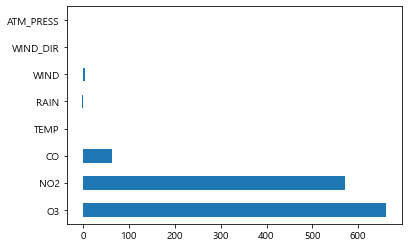

In [347]:
# 설명변수 중요도
selected_cols = ['O3','NO2','CO', 'TEMP', 'RAIN', 'WIND', 'WIND_DIR', 'ATM_PRESS']
df_reg_coef = pd.DataFrame({"Coef": reg_result.params.values[1:]}, index = selected_cols)
df_reg_coef.plot.barh(y = "Coef", legend = False)

O3, NO2, CO, WIND, RAIN순으로 변수중요도가 높음

In [193]:
# 설명변수간의 다중공선성 확인 : 설명변수 데이터 생성 및 상수항 추가
df_train_x = df_train[["O3", "NO2", "CO", "TEMP", "RAIN", "WIND", "WIND_DIR", "ATM_PRESS"]]

# statsmodels의 상수항 추가 함수 적용
df_train_x_const = add_constant(df_train_x) 

# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i) for i in range(df_train_x_const.shape[1])]

# VIF 정렬
df_vif.sort_values("VIF", inplace = True)
df_vif.round(3)

C:\Users\82102\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,variable,VIF
5,RAIN,1.308
7,WIND_DIR,1.632
6,WIND,1.832
1,O3,2.260
3,CO,2.823
4,TEMP,4.022
2,NO2,4.154
8,ATM_PRESS,4.327
0,const,64091.741


분산팽창지수(VIF)가 10이상인 변수가 ㅇ벗으므로 다중공선성이 없음

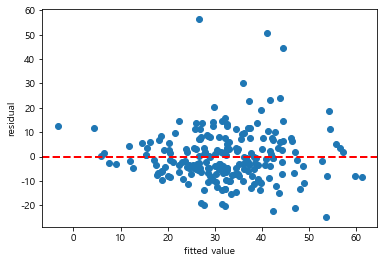

In [194]:
# 잔차 산점도 -> 등분산성(y =0을 기준으로 random 하게 산포)
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value"); plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "--", linewidth = 2, color = 'r')

y = 0을 기준으로 Random하게 산포되어 있으므로 등분산성 만족

C:\Users\82102\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


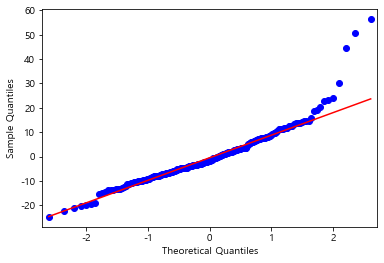

In [195]:
# 잔차 정규성 검정 -> 정규성(대체적으로 직선을 중심으로 분포)
qqplot(reg_result.resid, line = "q")
plt.show()

정규분포 직선을 중심으로 분포하므로 정규분포를 따름

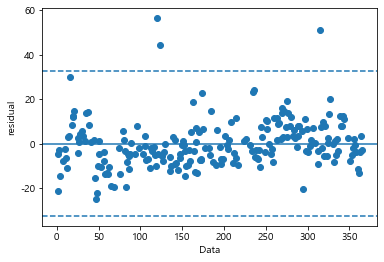

In [196]:
# 잔차의 독립성 -> 독립성(y = 0을 기준으로 관리상하한을 벗어나지 않고 random하게 산포)
plt.scatter(df_train.index, reg_result.resid, marker="o")
plt.xlabel("Data")
plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "-")
plt.axhline(y = 3*np.std(reg_result.resid), linestyle = "--")
plt.axhline(y = -3*np.std(reg_result.resid), linestyle = "--")

잔차가 y = 0을 기준으로 관리상하한을 벗어났으므로 독립성 불만족

In [197]:
# 평가용 데이터에 대한 성능 확인
train_pred = reg_result.predict(df_train)
test_pred = reg_result.predict(df_test)
print("train data의 결정계수:", r2_score(df_train_y, train_pred))
print("test data의 결정계수:", r2_score(df_test_y, test_pred))

train data의 결정계수: 0.4875263774707831
test data의 결정계수: 0.4680995626309159


Train Acc: 48.7% Test Acc: 46.8. 모델은 과소적합

#### 후진제거법

In [198]:
# RFE 함수: 입력된 모델을 이용하여 변수중요도가 낮은 순으로 순차적으로 제거

# sklearn의 선형회귀 모델
model = LinearRegression()

# 전체 변수 중 5개의 변수가 남을 때까지 변수 선택
rfe = RFE(estimator = model, n_features_to_select = 7).fit(df_train_x, df_train_y)

# 선택된 변수
selected_cols = df_train_x.columns[rfe.support_]

# 제거된 변수
removed_cols = df_train_x.columns[~rfe.support_]

print("Selected Variables : {}".format(selected_cols)) 
print("Removed Variables : {}".format(removed_cols))

Selected Variables : Index(['O3', 'NO2', 'CO', 'TEMP', 'RAIN', 'WIND', 'ATM_PRESS'], dtype='object')
Removed Variables : Index(['WIND_DIR'], dtype='object')


후진 제거법으로 O3, NO2, CO, TEMP, RAIN, WIND, ATM_PRESS 변수 선택

In [218]:
# 회귀 모델 생성
rfe_reg_model = smf.ols(formula = "PM10 ~ O3 + NO2 + CO + TEMP + RAIN + WIND", data = df_train)
# 적합
rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     30.00
Date:                Wed, 09 Mar 2022   Prob (F-statistic):           6.27e-26
Time:                        07:21:19   Log-Likelihood:                -838.83
No. Observations:                 219   AIC:                             1692.
Df Residuals:                     212   BIC:                             1715.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -30.4936      7.244     -4.209      0.0

    -분석 자료수: 219, 잔차 자유도: 212, 모델 자유도: 6 
    -p값이 유의수준 0.05보다 작으므로 회귀모델로서 유의
    -설명력: 0.444
    -회귀계수 검정: 절편의 유의성은 검토하지 않음(회귀식에는 절편의 유의성 상관없이 절편 포함). O3, NO2, CO, TEMP, RAIN, WIND의 p값이 유의수준 0.05보다 작으므로 유의
    -ATM_PRESS는 p.value > 0.05이므로 제거

<AxesSubplot:>

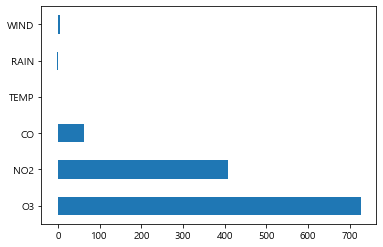

In [200]:
# 설명변수 중요도
selected_cols = ['O3','NO2','CO', 'TEMP', 'RAIN', 'WIND']
df_reg_coef = pd.DataFrame({"Coef": rfe_reg_result.params.values[1:]}, index = selected_cols)
df_reg_coef.plot.barh(y = "Coef", legend = False)

O3, NO2, CO, WIND, RAIN순으로 변수중요도가 높음

#### 다중선형 회귀분석 규제화

#### Ridge

In [201]:
# Ridge, Lasso, ElasticNet 패키지 불러오기
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [202]:
# 목표변수, 설명변수 데이터 지정
df_raw_y = df_raw["PM10"]
df_raw_x = df_raw.drop("PM10", axis = 1, inplace = False)

# train/test data 분리
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.4, random_state = 1234) 
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (219, 12)
train data Y size : (219,)
test data X size : (146, 12)
test data Y size : (146,)


In [203]:
# 모델 생성
ridge = Ridge(random_state=1234, alpha = 1)
ridge.fit(df_train_x, df_train_y)

# 절편값 확인
print(ridge.intercept_)

516.2679114617326


In [204]:
# 회귀계수 확인
df_ridge_coef = pd.DataFrame({"Coef": ridge.coef_}, index = df_train_x.columns)
df_ridge_coef

,Coef
O3,6.219016
NO2,3.678954
CO,55.625104
SO2,0.213089
TEMP,-0.320556
RAIN,-1.626094
WIND,0.247852
WIND_DIR,0.043399
HUMIDITY,-0.190941
ATM_PRESS,-0.502012


<AxesSubplot:>

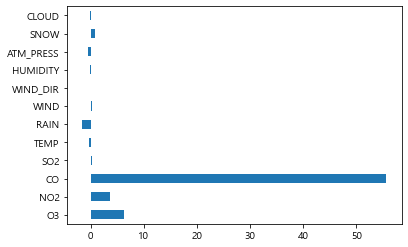

In [205]:
# 회귀계수 그래프
df_ridge_coef.plot.barh(y = "Coef", legend = False)

Ridge모델에서 CO, NO2, O3, RAIN순으로 변수중요도 높음

In [206]:
# 모델의 성능
train_pred = ridge.predict(df_train_x)
test_pred = ridge.predict(df_test_x)
print("train data의 결정계수:", r2_score(df_train_y, train_pred))
print("test data의 결정계수:", r2_score(df_test_y, test_pred))

train data의 결정계수: 0.361743960617698
test data의 결정계수: 0.3829790885742381


#### LASSO

In [207]:
# 모델 생성
lasso = Lasso(random_state=1234, alpha = 1)
lasso.fit(df_train_x, df_train_y)

# 절편값 확인
print(lasso.intercept_)

42.781661026683864


In [208]:
# 회귀계수 확인
df_lasso_coef = pd.DataFrame({"Coef": lasso.coef_}, index = df_train_x.columns)
df_lasso_coef

,Coef
O3,0.000000
NO2,0.000000
CO,0.000000
SO2,0.000000
TEMP,-0.303852
RAIN,-0.301870
WIND,-0.616725
WIND_DIR,0.009569
HUMIDITY,-0.115876
ATM_PRESS,-0.000000


<AxesSubplot:>

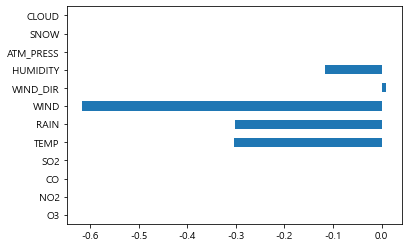

In [209]:
# 회귀계수 그래프
df_lasso_coef.plot.barh(y = "Coef", legend = False)

LASSO모델에서 WIND, TEMP, RAIN, HUMIDITY, WIND_DIR순으로 변수중요도 높음

In [210]:
# 모델의 성능
train_pred = lasso.predict(df_train_x)
test_pred = lasso.predict(df_test_x)
print("train data의 결정계수:", r2_score(df_train_y, train_pred))
print("test data의 결정계수:", r2_score(df_test_y, test_pred))

train data의 결정계수: 0.08510738920911942
test data의 결정계수: 0.07191816761566772


#### ElasticNet

In [211]:
# 모델 생성
elastic = ElasticNet(random_state=1234, alpha = 1, l1_ratio = 0.5)
elastic.fit(df_train_x, df_train_y)

# 절편값 확인
print(elastic.intercept_)

94.80870983032933


In [212]:
# 회귀계수 확인
df_elastic_coef = pd.DataFrame({"Coef": elastic.coef_}, index = df_train_x.columns)
df_elastic_coef

,Coef
O3,0.000000
NO2,0.000000
CO,0.697120
SO2,0.000000
TEMP,-0.341188
RAIN,-0.648691
WIND,-0.827391
WIND_DIR,0.010050
HUMIDITY,-0.113541
ATM_PRESS,-0.051237


<AxesSubplot:>

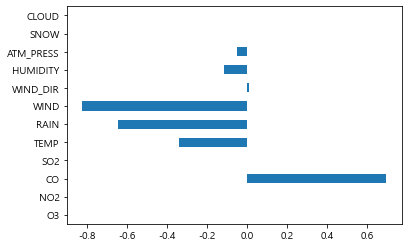

In [213]:
df_elastic_coef.plot.barh(y = "Coef", legend = False)

ElasticNet모델에서 WIND, NO2, RAIN, TEMP, HUMIDITY순으로 변수중요도 높음

In [214]:
# 모델의 성능
train_pred = elastic.predict(df_train_x)
test_pred = elastic.predict(df_test_x)
print("train data의 결정계수:", r2_score(df_train_y, train_pred))
print("test data의 결정계수:", r2_score(df_test_y, test_pred))

train data의 결정계수: 0.09535512017697756
test data의 결정계수: 0.08356670320220716


### 의사결정나무

In [353]:
# 데이터 처리
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
# export_graphviz: 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
# graphviz: 나무 구조 시각화 
import graphviz
# 데이터 분할
from sklearn.model_selection import train_test_split
# 예측/회귀 Decision Tree
from sklearn.tree import DecisionTreeRegressor
# 최적 모델, 파라미터 검색
from sklearn.model_selection import GridSearchCV

In [354]:
import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files (x86)/Graphviz/bin/'

In [355]:
df_raw = pd.read_csv('DATA/AIR_POLLUTION.csv')
df_raw.drop('MeasDate', axis = 1, inplace = True)
df_raw.dropna(subset=['PM10'] , inplace = True)
df_raw.fillna(df_raw.mean(), inplace = True)

In [356]:
# 목표변수, 설명변수 데이터 지정
df_raw_y = df_raw['PM10']
df_raw_x = df_raw.drop('PM10', axis = 1, inplace = False)

In [357]:
# train_test_split
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.4, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (219, 12)
train data Y size : (219,)
test data X size : (146, 12)
test data Y size : (146,)


In [358]:
# 기본 모델생성
tree_uncustomized = DecisionTreeRegressor(random_state=1234)
tree_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))

# test 데이터 설명력
print("Score on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 1.000
Score on test set: -0.160


Train Accuracy: 100%, Test Accuracy: -0.16%. 모델은 train 데이터에 과대적합

#### min_samples_leaf

In [359]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = [ ]

# min_samples_leaf: 잎사귀 최소 자료 수
para_leaf = [n_leaf * 1 for n_leaf in range(1, 20)]            # 참조: para_leaf : [1,2,3,…,19]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=1234
                                 , min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,-0.160
1,2,0.935,0.067
2,3,0.833,0.306
3,4,0.777,0.392
4,5,0.746,0.363
5,6,0.687,0.333
6,7,0.636,0.389
7,8,0.628,0.367
8,9,0.619,0.399
9,10,0.590,0.335


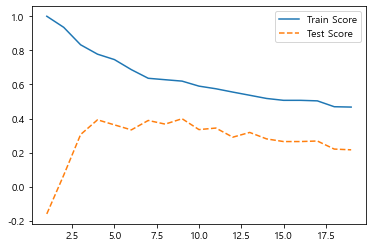

In [360]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.legend()

잎사귀 노드 최소 자료 수 증가에 따라 모델의 정확도는 감소, 데이터 성능 변화를 고려하여 8 선택

#### min_samples_split

In [361]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = [ ]

# min_samples_leaf: 잎사귀 최소 자료 수
para_split = [n_split * 2 for n_split in range(1, 20)]            # 참조: para_leaf : [1,2,3,…,19]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234
                                 , min_samples_leaf=9, min_samples_split=v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesLeaf"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,2,0.619,0.399
1,4,0.619,0.399
2,6,0.619,0.399
3,8,0.619,0.399
4,10,0.619,0.399
5,12,0.619,0.399
6,14,0.619,0.399
7,16,0.619,0.399
8,18,0.619,0.399
9,20,0.596,0.390


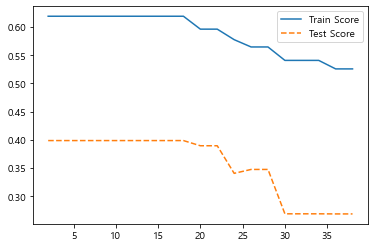

In [362]:
# 모델 설명력 그래프 확인
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.legend()

분리 노드의 최소 자료 수 증가에 따라 모델의 정확도는 감소, 데이터의 성능 변화를 고려하여 20 선택

#### max_depth

In [363]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = [ ]

# min_samples_leaf: 잎사귀 최소 자료 수
para_depth = [depth for depth in range(1, 11)]            # 참조: para_leaf : [1,2,3,…,19]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=9, min_samples_split=20, max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 결과 저장
df_score_depth = pd.DataFrame()
df_score_depth["MinSamplesLeaf"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.201,0.307
1,2,0.340,0.245
2,3,0.413,0.318
3,4,0.502,0.355
4,5,0.556,0.348
5,6,0.592,0.388
6,7,0.596,0.390
7,8,0.596,0.390
8,9,0.596,0.390
9,10,0.596,0.390


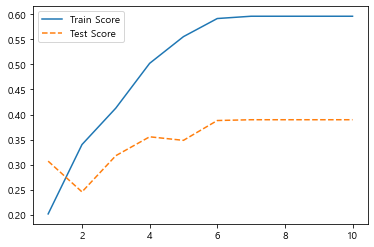

In [364]:
# 모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.legend()

최대 깊이 증가에 따라 모델의 정확도는 증가하며, 데이터의 성능 변화를 고려하여 6 선택 가능

#### 최종 모델 선정

In [365]:
v_feature_name = df_train_x.columns

In [366]:
tree_final = DecisionTreeRegressor(min_samples_leaf = 8, min_samples_split = 20, max_depth = 6, random_state=1234)
tree_final.fit(df_train_x, df_train_y)
# train 데이터 설명력
print("Score on training set: {:.3f}".format(tree_final.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set: {:.3f}".format(tree_final.score(df_test_x, df_test_y)))

Score on training set: 0.592
Score on test set: 0.408


Train Acc: 59.2% Test Acc: 40.8

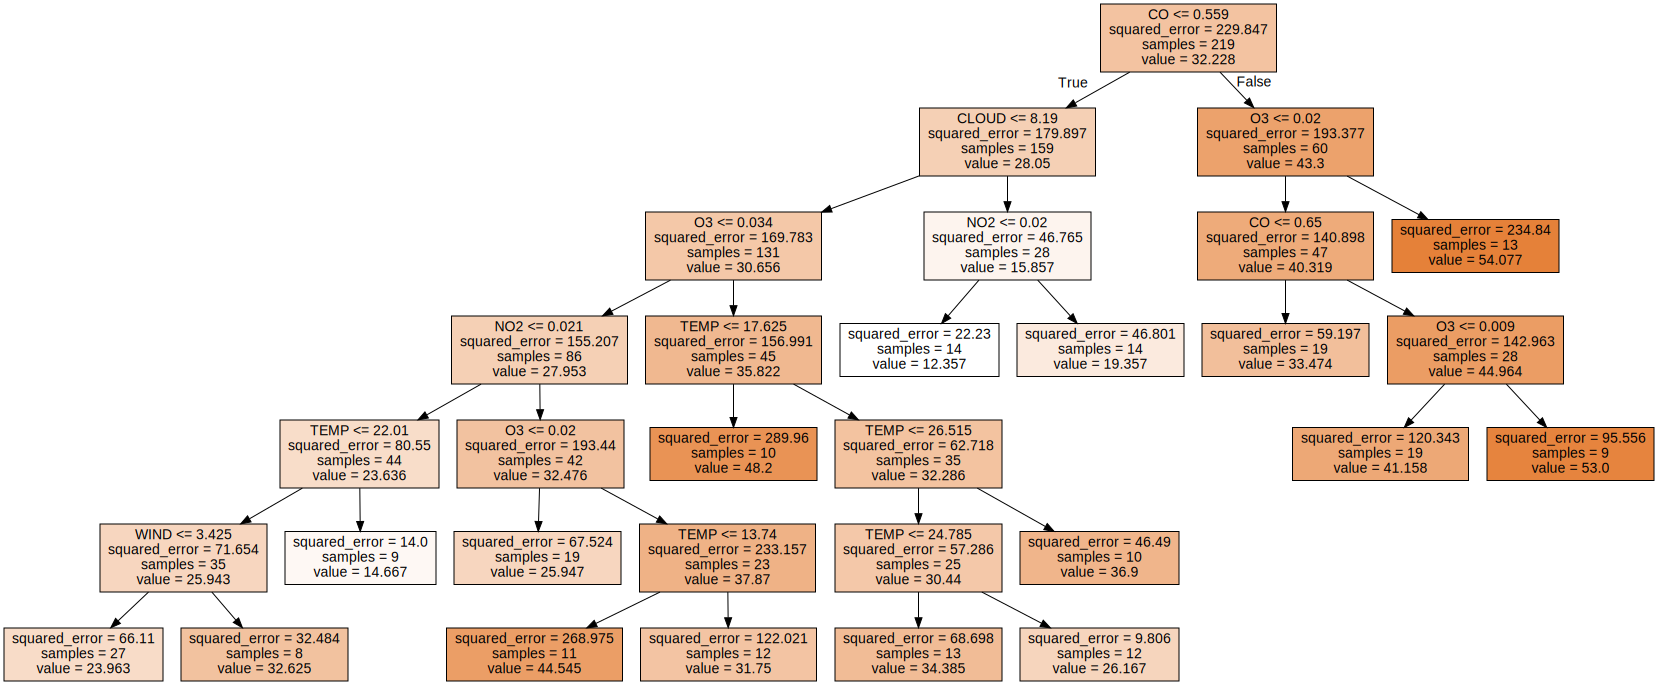

In [367]:
export_graphviz(tree_final, out_file = "tree_final.dot", feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

    -트리 분리에 영향이 큰 변수는 CO(일산화탄소 농도), O3(오존 농도), CLOUD(전운량) 순서이다.
    -CO <= 0.559 이면 미세먼지 농도 감소(자료수=159, squared_error 지수는 감소), CO > 0.559 이면 미세먼지 농도 증가(자료수=60, squared_error 지수는 감소)로 분리
    -CO <= 0.559 & CLOUD > 8.19 & NO2 <= 0.02 이면 미세먼지 농도가 감소
    -오존 농도가 0.559 이하이고, 전운량이 8.19 초과이고, 이산화질소 농도가 0.02 이하이면 미세먼지 농도가 감소할 확률이 높다.

In [234]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
2,CO,0.390
0,O3,0.204
11,CLOUD,0.170
4,TEMP,0.152
1,NO2,0.068
6,WIND,0.016
3,SO2,0.000
5,RAIN,0.000
7,WIND_DIR,0.000
8,HUMIDITY,0.000


Text(0, 0.5, '변수')

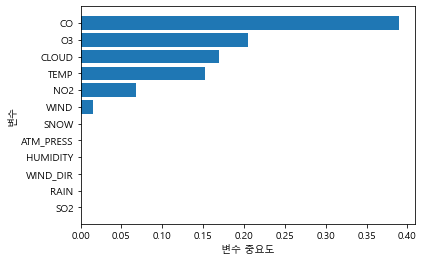

In [235]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

설명변수 중요도는 CO, O3, CLOUD, TEMP 순으로 높다

### 랜덤 포레스트

In [236]:
# 데이터 처리
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
# export_graphviz: 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
# graphviz: 나무 구조 시각화 
import graphviz
# 데이터 분할
from sklearn.model_selection import train_test_split
# 예측/회귀 Decision Tree
from sklearn.ensemble import RandomForestRegressor
# 최적 모델, 파라미터 검색
from sklearn.model_selection import GridSearchCV

In [237]:
import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files (x86)/Graphviz/bin/'

In [238]:
df_raw = pd.read_csv('DATA/AIR_POLLUTION.csv')
df_raw.drop('MeasDate', axis = 1, inplace = True)
df_raw.dropna(subset=['PM10'] , inplace = True)
df_raw.fillna(df_raw.mean(), inplace = True)

In [239]:
# 목표변수, 설명변수 데이터 지정
df_raw_y = df_raw['PM10']
df_raw_x = df_raw.drop('PM10', axis = 1, inplace = False)

In [240]:
# train_test_split
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.4, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (219, 12)
train data Y size : (219,)
test data X size : (146, 12)
test data Y size : (146,)


In [241]:
# 기본 모델생성
rf_uncustomized = RandomForestRegressor(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))

# test 데이터 설명력
print("Score on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.915
Score on test set: 0.452


In [242]:
rf_uncustomized

RandomForestRegressor(random_state=1234)

In [298]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = [ ]

# min_samples_leaf: 잎사귀 최소 자료 수
para_n_tree = [n_tree * 1 for n_tree in range(30, 50)]            

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators=v_n_estimators, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 결과 저장
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,30,0.902,0.439
1,31,0.901,0.444
2,32,0.902,0.441
3,33,0.904,0.439
4,34,0.905,0.437
5,35,0.904,0.442
6,36,0.906,0.447
7,37,0.907,0.449
8,38,0.907,0.448
9,39,0.906,0.449


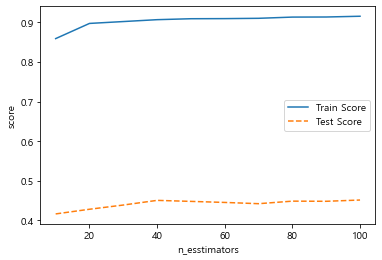

In [244]:
# 모델 설명력 그래프 확인
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_esstimators")
plt.legend()

n_estimation = 40

#### min_samples_leaf

In [305]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = [ ]

# min_samples_leaf: 잎사귀 최소 자료 수
para_leaf = [n_leaf * 1 for n_leaf in range(1, 21)]         

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state=1234, n_estimators = 41
                                 , min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.907,0.452
1,2,0.858,0.456
2,3,0.805,0.449
3,4,0.766,0.447
4,5,0.723,0.450
5,6,0.685,0.444
6,7,0.655,0.428
7,8,0.633,0.419
8,9,0.610,0.410
9,10,0.589,0.406


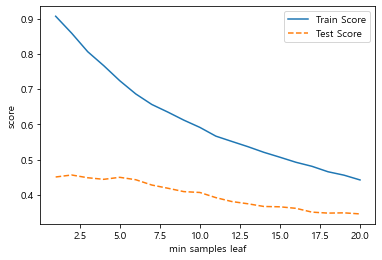

In [246]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

잎사귀 노드 최소 자료 수 증가에 따라 모델의 정확도는 감소, 데이터 성능 변화를 고려하여 5 선택

#### min_samples_split

In [312]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = [ ]

# min_samples_leaf: 잎사귀 최소 자료 수
para_split = [n_split * 2 for n_split in range(2, 21)]           

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state=1234, n_estimators = 41
                                 , min_samples_leaf=5, min_samples_split=v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesLeaf"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,4,0.723,0.450
1,6,0.723,0.450
2,8,0.723,0.450
3,10,0.723,0.450
4,12,0.706,0.445
5,14,0.684,0.436
6,16,0.670,0.434
7,18,0.660,0.432
8,20,0.643,0.429
9,22,0.627,0.422


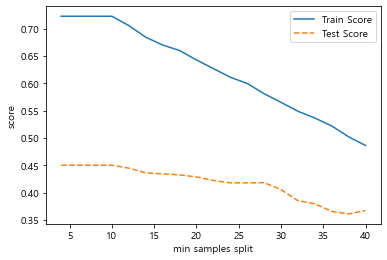

In [313]:
# 모델 설명력 그래프 확인
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

분리 노드의 최소 자료 수 증가에 따라 모델의 정확도는 감소, 데이터의 성능 변화를 고려하여 10 선택

#### max_depth

In [321]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = [ ]

# min_samples_leaf: 잎사귀 최소 자료 수
para_depth = [depth for depth in range(1, 11)]            

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state=1234, n_estimators = 41, 
                               min_samples_leaf=5, min_samples_split=10, max_depth = v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))

# 결과 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.221,0.310
1,2,0.390,0.322
2,3,0.506,0.389
3,4,0.604,0.432
4,5,0.666,0.445
5,6,0.698,0.453
6,7,0.713,0.453
7,8,0.721,0.449
8,9,0.722,0.449
9,10,0.723,0.450


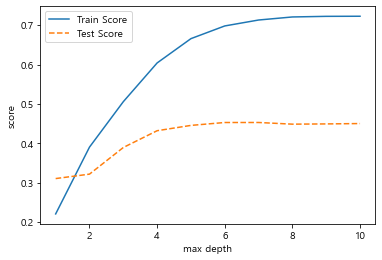

In [322]:
# 모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()

최대 깊이 증가에 따라 모델의 정확도는 증가하며, 데이터의 성능 변화를 고려하여 6 선택

#### 최종 모델 선정

In [325]:
rf_final = RandomForestRegressor(n_estimators = 41, min_samples_leaf = 5, min_samples_split = 10, max_depth = 6, random_state=1234)
rf_final.fit(df_train_x, df_train_y);
# train 데이터 설명력
print("Score on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set: 0.698
Score on test set: 0.453


Train Acc: 68.1% Test Acc: 44.5%. 디폴트 모델의 과대적합을 조금은 개선했다

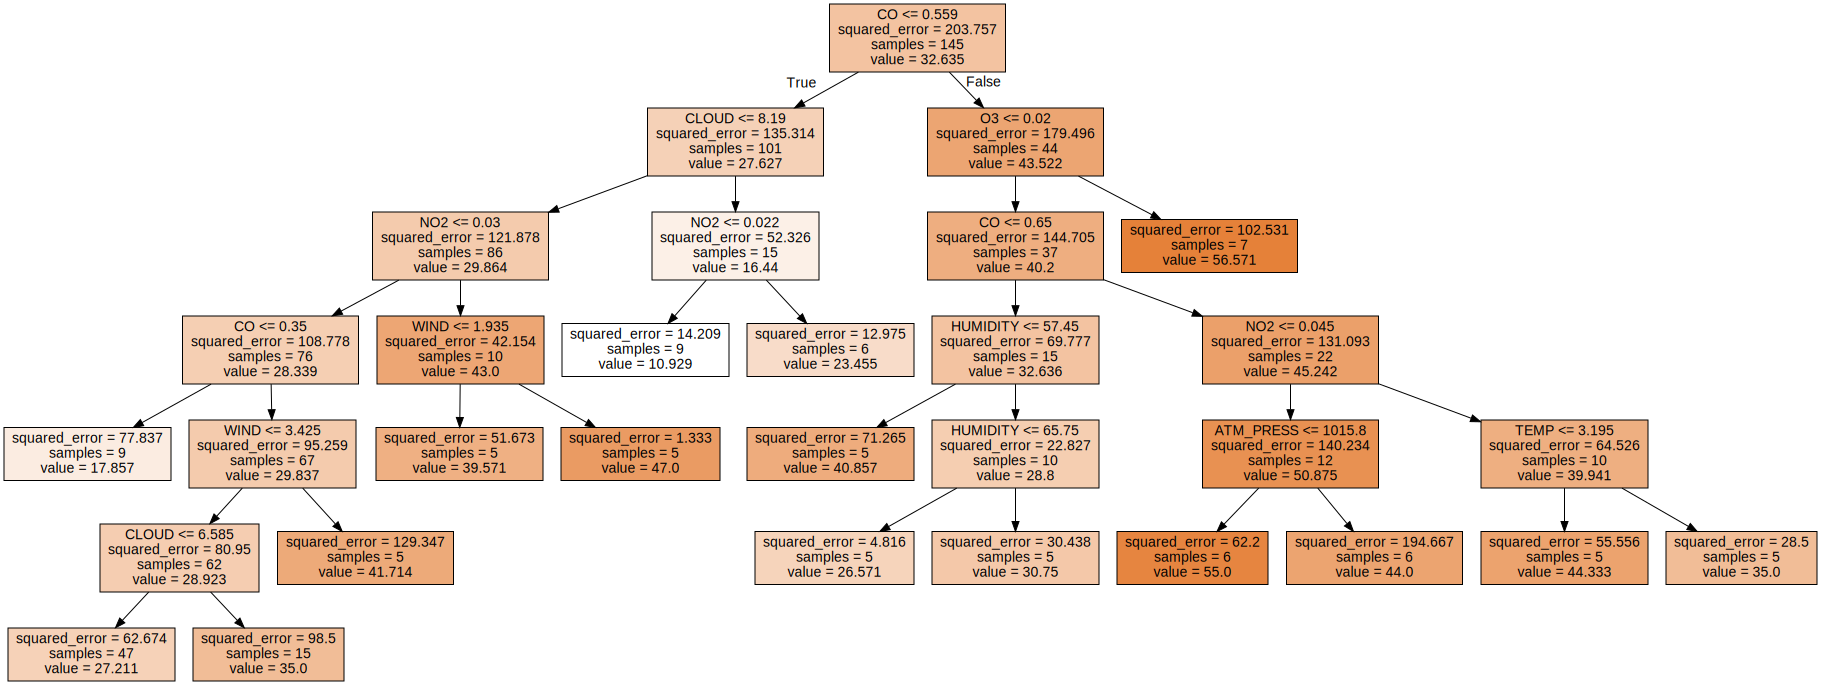

In [351]:
# 변수명 저장
v_feature_name = df_train_x.columns
# 0번 트리
export_graphviz(rf_final.estimators_[0], out_file="rfr_final_0.dot",
                feature_names = v_feature_name, impurity = True, filled = True)
with open("rfr_final_0.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

    -트리 분리에 영향이 큰 변수는 CO(일산화탄소 농도), O3(오존 농도), CLOUD(전운량) 순서이다.
    -CO <= 0.559 이면 미세먼지 농도 감소(자료수=101, squared_error 지수는 감소), CO > 0.559 이면 미세먼지 농도 증가(자료수=44, squared_error 지수는 감소)로 분리
    -CO <= 0.559 & CLOUD > 8.19 & NO2 <= 0.022 이면 미세먼지 농도가 감소
    -오존 농도가 0.559 이하이고, 전운량이 8.19 초과이고, 이산화질소 농도가 0.022 이하이면 미세먼지 농도가 감소할 확률이 높다.

In [327]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name

df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
2,CO,0.390
0,O3,0.204
11,CLOUD,0.170
4,TEMP,0.152
1,NO2,0.068
6,WIND,0.016
3,SO2,0.000
5,RAIN,0.000
7,WIND_DIR,0.000
8,HUMIDITY,0.000


Text(0, 0.5, '변수')

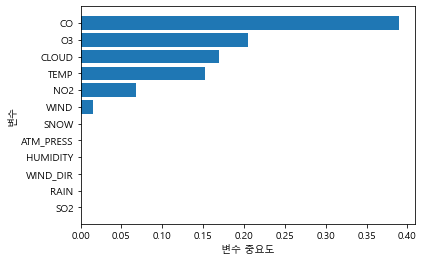

In [328]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

설명변수 중요도는 CO, O3, CLOUD, TEMP, NO2 순으로 높다

### 그래디언트 부스팅

In [256]:
# 데이터 처리
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
# export_graphviz: 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
# graphviz: 나무 구조 시각화 
import graphviz
# 데이터 분할
from sklearn.model_selection import train_test_split
# 예측/회귀 Decision Tree
from sklearn.ensemble import GradientBoostingRegressor
# 최적 모델, 파라미터 검색
from sklearn.model_selection import GridSearchCV

In [257]:
import os
os.environ["PATH"]+=os.pathsep+'C:/Program Files (x86)/Graphviz/bin/'

In [258]:
df_raw = pd.read_csv('DATA/AIR_POLLUTION.csv')
df_raw.drop('MeasDate', axis = 1, inplace = True)
df_raw.dropna(subset=['PM10'] , inplace = True)
df_raw.fillna(df_raw.mean(), inplace = True)

In [259]:
# 목표변수, 설명변수 데이터 지정
df_raw_y = df_raw['PM10']
df_raw_x = df_raw.drop('PM10', axis = 1, inplace = False)

In [260]:
# train_test_split
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.4, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (219, 12)
train data Y size : (219,)
test data X size : (146, 12)
test data Y size : (146,)


In [261]:
# 기본 모델생성
gb_uncustomized = GradientBoostingRegressor(random_state=1234)
gb_uncustomized.fit(df_train_x, df_train_y)

# Train 데이터 설명력
print("Score on training set: {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))

# test 데이터 설명력
print("Score on test set: {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.946
Score on test set: 0.469


Train Accuracy: 94.6%, Test Accuracy: 46.9%. 모델은 train 데이터에 과대적합

In [262]:
gb_uncustomized

GradientBoostingRegressor(random_state=1234)

In [276]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = [ ]

# n_estimatos: 트리 수 변경
para_n_tree = [n_tree * 1 for n_tree in range(30, 50)]            

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(n_estimators=v_n_estimators, random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,30,0.753,0.444
1,31,0.760,0.446
2,32,0.765,0.454
3,33,0.777,0.457
4,34,0.785,0.456
5,35,0.789,0.468
6,36,0.793,0.467
7,37,0.798,0.470
8,38,0.803,0.473
9,39,0.811,0.474


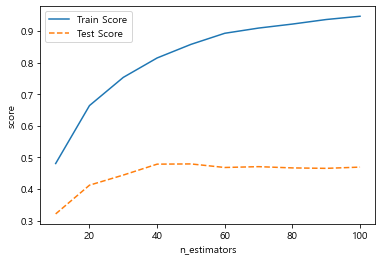

In [264]:
# 모델 설명력 그래프 확인
plt.plot(para_n_tree, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

트리 수 증가에 따라 모델의 설명력은 지속적으로 향상. Test 데이터의 성능 변화를 고려하여 42 선택

#### min_samples_leaf

In [277]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = [ ]

# min_samples_leaf: 잎사귀 최소 자료 수
para_leaf = [n_leaf * 1 for n_leaf in range(1, 21)]         

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 42, min_samples_leaf=v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.823,0.481
1,2,0.811,0.480
2,3,0.801,0.500
3,4,0.788,0.505
4,5,0.796,0.490
5,6,0.784,0.470
6,7,0.763,0.464
7,8,0.766,0.459
8,9,0.759,0.476
9,10,0.760,0.475


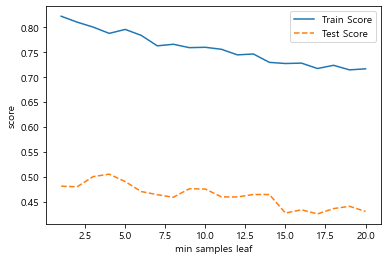

In [278]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

잎사귀 노드 최소 자료 수 증가에 따라 모델의 정확도는 감소, 데이터 성능 변화를 고려하여 4 선택

#### min_samples_split

In [279]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = [ ]

# min_samples_split: 분할하기 위한 노드의 최소 자료수
para_split = [n_split * 2 for n_split in range(1, 21)]           

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 42, min_samples_leaf=4, min_samples_split=v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_split = pd.DataFrame()
df_score_split["MinSamplesLeaf"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,2,0.788,0.505
1,4,0.788,0.505
2,6,0.788,0.505
3,8,0.788,0.505
4,10,0.788,0.497
5,12,0.784,0.483
6,14,0.771,0.496
7,16,0.780,0.496
8,18,0.768,0.506
9,20,0.766,0.509


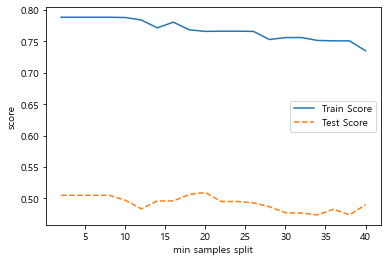

In [280]:
# 모델 설명력 그래프 확인
plt.plot(para_split, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

분리 노드의 최소 자료 수 증가에 따라 모델의 정확도는 감소, 데이터의 성능 변화를 고려하여 20 선택 

#### max_depth

In [281]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = [ ]

# max_depth: 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]            

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 42,
                               min_samples_leaf=4, min_samples_split=20, max_depth = v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.394,0.307
1,2,0.624,0.453
2,3,0.766,0.509
3,4,0.867,0.457
4,5,0.924,0.472
5,6,0.939,0.478
6,7,0.954,0.481
7,8,0.959,0.442
8,9,0.961,0.450
9,10,0.960,0.444


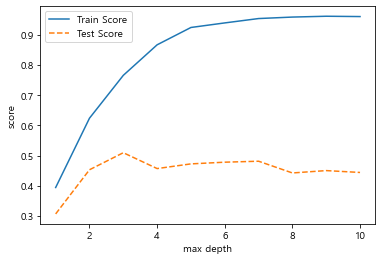

In [282]:
# 모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()

최대 깊이 증가에 따라 모델의 정확도는 증가하며, 데이터의 성능 변화를 고려하여 3 선택 

#### learning_rate

In [283]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = [ ]

# learning rate
para_lr = [lr * 0.01 for lr in range(1, 20)]            

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 42,min_samples_leaf=4,
                                   min_samples_split=20, max_depth = 3, learning_rate = v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))

# 결과 저장
df_score_lr = pd.DataFrame()
df_score_lr["LearningRate"] = para_lr
df_score_lr["TrainScore"] = train_score
df_score_lr["TestScore"] = test_score
df_score_lr.round(3)

,LearningRate,TrainScore,TestScore
0,0.01,0.247,0.172
1,0.02,0.404,0.284
2,0.03,0.516,0.350
3,0.04,0.591,0.394
4,0.05,0.634,0.430
5,0.06,0.677,0.448
6,0.07,0.702,0.457
7,0.08,0.719,0.469
8,0.09,0.751,0.489
9,0.10,0.766,0.509


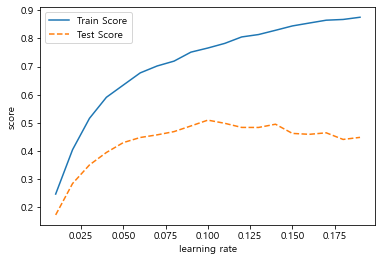

In [284]:
# 모델 설명력 그래프 확인
plt.plot(para_lr, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_lr, test_score, linestyle = "--", label = "Test Score")
plt.ylabel("score"); plt.xlabel("learning rate")
plt.legend()

학습률 증가에 따라 모델의 설명력은 증가. learnig_rate = 0.1 선택

#### 최종 모델 선정

In [273]:
gb_final = GradientBoostingRegressor(n_estimators = 42, min_samples_leaf = 4, min_samples_split = 20,
                                     max_depth = 3, learning_rate = 0.1, random_state=1234)
gb_final.fit(df_train_x, df_train_y)
# train 데이터 설명력
print("Score on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
# test 데이터 설명력
print("Score on test set: {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Score on training set: 0.766
Score on test set: 0.509


Train Acc: 76.6% Test Acc: 50.9%. 파라미터 조절을 통해 정확도를 개선했다

In [274]:
# 변수명 저장
v_feature_name = df_train_x.columns

# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
2,CO,0.342
0,O3,0.202
11,CLOUD,0.106
4,TEMP,0.093
7,WIND_DIR,0.075
9,ATM_PRESS,0.054
1,NO2,0.050
6,WIND,0.036
8,HUMIDITY,0.031
5,RAIN,0.012


Text(0, 0.5, '변수')

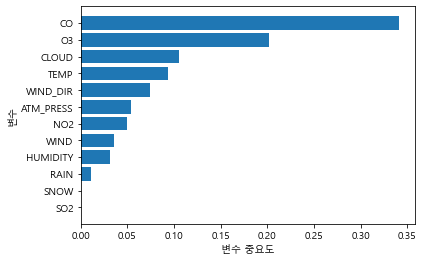

In [275]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

설명변수 중요도는 CO, O3, CLOUD, TEMP, ATM_PRESS 순으로 높다

## 모델평가

In [285]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# train, test 데이터 분할 함수
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [286]:
# RMSE:root mean squared error 함수
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# MAPE:mean absolute percentage error 함수
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [287]:
# 맑은 고딕 적용
matplotlib.rc("font", family = "Malgun Gothic")
# 음수 표시
matplotlib.rcParams['axes.unicode_minus'] = False

In [288]:
df_raw = pd.read_csv('DATA/AIR_POLLUTION.csv')

df_raw.drop('MeasDate', axis = 1, inplace = True)
df_raw.dropna(subset=['PM10'] , inplace = True)
df_raw.fillna(df_raw.mean(), inplace = True)

In [289]:
# train/test data 분리
df_train, df_test = train_test_split(df_raw, test_size = 0.4, random_state = 1234) 
print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (219, 13)
test data size : (146, 13)


In [290]:
# 목표변수, 설명변수 데이터 지정
df_raw_y = df_raw['PM10']
df_raw_x = df_raw.drop("PM10", axis = 1, inplace = False)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.4, random_state = 1234)

In [329]:
reg_model = smf.ols(formula = "PM10 ~ O3 + NO2 + CO + TEMP + RAIN + WIND + WIND_DIR + ATM_PRESS", data = df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

tree_final = DecisionTreeRegressor(min_samples_leaf = 8, min_samples_split = 20, max_depth = 6, random_state=1234)
tree_final.fit(df_train_x, df_train_y)


rf_final = RandomForestRegressor(n_estimators = 41, min_samples_leaf = 5, min_samples_split = 10, max_depth = 6, random_state=1234)
rf_final.fit(df_train_x, df_train_y);

gb_final = GradientBoostingRegressor(n_estimators = 42, min_samples_leaf = 4, min_samples_split = 20,
                                     max_depth = 3, learning_rate = 0.1, random_state=1234)
gb_final.fit(df_train_x, df_train_y)

                            OLS Regression Results                            
Dep. Variable:                   PM10   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     24.97
Date:                Wed, 09 Mar 2022   Prob (F-statistic):           7.99e-27
Time:                        14:13:43   Log-Likelihood:                -832.94
No. Observations:                 219   AIC:                             1684.
Df Residuals:                     210   BIC:                             1714.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    346.1263    189.604      1.826      0.0

GradientBoostingRegressor(min_samples_leaf=4, min_samples_split=20,
                          n_estimators=42, random_state=1234)

    최종모델선택
    -선형회귀모델은 전진제거로 선택된 설명변수를 이용
    -의사결정나무 파라미터 값으로는 min_samples_leaf = 8, min_samples_split = 20, max_depth = 6 선택
    -랜덤포레스트 파라미터 값으로는 n_estimators = 41, min_samples_leaf = 5, min_samples_split = 10, max_depth = 6 선택
    -그래디언트 부스팅 파라미터 값으로는 n_estimators = 42, min_samples_leaf = 4, min_samples_split = 20, max_depth = 3, learning_rate = 0.1, 선택

In [330]:
models = ["회귀분석", "의사결정나무", "랜덤 포레스트", "그래디언트 부스팅"]
mse, rmse, mae, mape = [],[],[],[]

In [331]:
# 예측
lr_y_pred = reg_result.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y, lr_y_pred))
mae.append(mean_absolute_error(df_test_y, lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, lr_y_pred))

In [332]:
# 예측
dt_y_pred = tree_final.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y, dt_y_pred))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))

In [333]:
# 예측
rf_y_pred = rf_final.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y, rf_y_pred))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

In [334]:
gb_y_pred = gb_final.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y, gb_y_pred))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

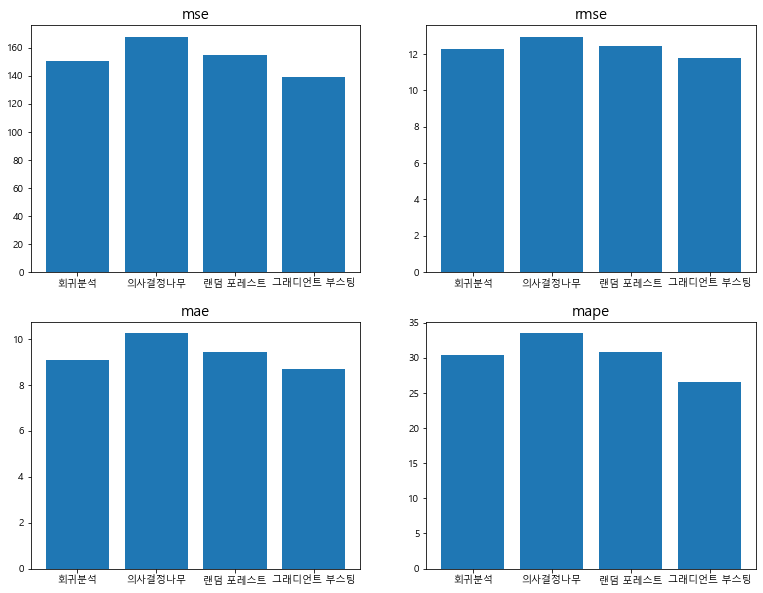

In [335]:
fig, ax = plt.subplots(2,2, figsize = (13,10))
ax[0, 0].bar(models, mse)
ax[0, 0].set_title("mse").set_fontsize(15)

ax[0, 1].bar(models, rmse)
ax[0, 1].set_title("rmse").set_fontsize(15)

ax[1, 0].bar(models, mae)
ax[1, 0].set_title("mae").set_fontsize(15)

ax[1, 1].bar(models, mape)
ax[1, 1].set_title("mape").set_fontsize(15)

    -파라미터 값을 쪼절한 그래디언트 부스팅의 정확도가 가장 높고, 반면에 의사결정나무 모델의 성능이 가장 미흡하다.
    -평가 지표별 모델의 정확도 추세는 유사하게 나타남